In [2]:
import numpy as np
import pandas as pd

import seaborn
from matplotlib import pyplot

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import normalize

from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from google.colab import drive

drive.mount('/content/gdrive')


Mounted at /content/gdrive


## Setup

The file `reviews.txt` contains tab-delimited data for 4835 reviews from Yelp.


In [3]:
reviews_df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/reviews.tsv", delimiter="\t")
reviews_df.head()

,Rating,Text
0,positive,These guys are AMAZING! I brought my car in an...
1,positive,Matt and Tim were great. When going over solut...
2,positive,"Well, I have a little 2001 Ford Taurus. My lov..."
3,positive,You won't be disappointed. We've eaten here ab...
4,positive,"Wow, just realized my reviews were never finis..."


We can access just the "Text" column, and then get the 0th element of that column to get the full text of a review.

In [4]:
print(reviews_df["Text"][0])

These guys are AMAZING! I brought my car in and they checked over the WHOLE car! I realize my car needs some TLC. The guys prioritized my list of things I need to get done and made me estimates too. I know I have alot of money I need to save to fix my car but the guys are helping me out and we are doing a little at a time. I LOVE the fact they told me EVERYTHING that was wrong with my car. They have a GREAT staff, a WONDERFUL warranty (2 years/24,000 miles on Parts & Labor), AMAZING technicians, and an attitude of service. I feel at home and will NEVER take my car someplace else, EVEN just for an oil change!!!


## Problem 1 (5 points)

Create a variable `count_vectorizer` and set it equal to a new `CountVectorizer()`.
Then use the `fit_transform` function on the `"Text"` field, saving the result in a variable called `word_counts`. See [the sklearn docs](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) for an example.
Print the first row of the `word_counts` array.

In [5]:
count_vectorizer = CountVectorizer()
word_counts = count_vectorizer.fit_transform(reviews_df["Text"])
print(word_counts[0,:])

  (0, 17701)	1
  (0, 8096)	3
  (0, 1290)	3
  (0, 990)	2
  (0, 2634)	1
  (0, 11529)	6
  (0, 3047)	6
  (0, 8957)	1
  (0, 1058)	5
  (0, 17705)	3
  (0, 3401)	1
  (0, 12307)	1
  (0, 17668)	4
  (0, 19350)	1
  (0, 14100)	1
  (0, 11655)	1
  (0, 16264)	1
  (0, 17896)	1
  (0, 13572)	1
  (0, 10272)	1
  (0, 12016)	3
  (0, 17721)	1
  (0, 11649)	2
  (0, 17901)	3
  (0, 7632)	1
  :	:
  (0, 19491)	1
  (0, 19127)	1
  (0, 19641)	1
  (0, 178)	1
  (0, 1)	1
  (0, 11106)	1
  (0, 12098)	1
  (0, 12601)	1
  (0, 9880)	1
  (0, 17511)	1
  (0, 1044)	2
  (0, 1521)	1
  (0, 15529)	1
  (0, 6772)	1
  (0, 8581)	1
  (0, 19387)	1
  (0, 11705)	1
  (0, 17353)	1
  (0, 16273)	1
  (0, 6073)	1
  (0, 6368)	1
  (0, 9605)	1
  (0, 7159)	1
  (0, 12053)	1
  (0, 3324)	1


##  Problem 2 (5 points)

The vectorizer converts a string to an array representing the number of times each word occurs, which are called the *term frequencies*. It creates one of these arrays for each document. This process loses information. The vectorizer can also work in reverse: it turns a list of numbers into words. In order to see the effect of turning a document into a vector (array) of numbers, use the CountVectorizer's function `inverse_transform` to reverse this process for the 0th document, which is the first row of `word_counts`. Describe what is preserved about the original review and what is not preserved.

In [6]:
count_vectorizer.inverse_transform((word_counts[0])) 

[array(['these', 'guys', 'are', 'amazing', 'brought', 'my', 'car', 'in',
        'and', 'they', 'checked', 'over', 'the', 'whole', 'realize',
        'needs', 'some', 'tlc', 'prioritized', 'list', 'of', 'things',
        'need', 'to', 'get', 'done', 'made', 'me', 'estimates', 'too',
        'know', 'have', 'alot', 'money', 'save', 'fix', 'but', 'helping',
        'out', 'we', 'doing', 'little', 'at', 'time', 'love', 'fact',
        'told', 'everything', 'that', 'was', 'wrong', 'with', 'great',
        'staff', 'wonderful', 'warranty', 'years', '24', '000', 'miles',
        'on', 'parts', 'labor', 'technicians', 'an', 'attitude', 'service',
        'feel', 'home', 'will', 'never', 'take', 'someplace', 'else',
        'even', 'just', 'for', 'oil', 'change'], dtype='<U79')]

**Answer here**


## Problem 3 (Sparse representations, 5 points)

One of the problems you will face in data science is how to work with really big data sets. One important skill is knowing how to use the most efficient data representations. 

So far we have been working with "dense" arrays. An array with 20 rows and 10 columns will allocate memory for 200 numbers. Dense arrays are fine for small data sets.
The vectorizer converts an input string into a vector (array) representing the frequency of each word in each document.
Since most words don't occur in most documents, it returns a "sparse" array that does not explicitly represent values of zero.

Print the `shape` of the word_count array and the number of non-zeros (`.nnz`) in the array.
A python floating point number takes 8 bytes. Calculate the number of bytes needed to store the full, dense matrix (ie multiply the dimensions of the array). A sparse array needs to store three numbers for each non-zero value: the index of the row, the index of the column, and the actual floating point value. Assume each takes eight bytes. Calculate the number of bytes needed to store the sparse array. Finally, print the size of the sparse array in bytes divided by the  size of the dense array in bytes.

In [7]:
print(word_counts.shape, word_counts.nnz) 

print(4835*19790*8, 354342*3*8)

print(8504208/765477200)


(4835, 19790) 354342
765477200 8504208
0.011109681646951731


## Problem 4 (vocabularies and indices, 5 points)

Use the `.get_feature_names_out()` function in the vectorizer object to get an array of the distinct word strings (word types) that the vectorizer identified in the reviews. Save this as a variable called `vocabulary`. Print the first 20 elements. Are the strings in any particular order?

The *index* of a word is its position in this array. Use `np.where()` to find the index of the word "amazing".
Print the index number and confirm that this index is correct by printing the element in `vocabulary` at that index position. **Confidence check: it should be at index 990.**

In [8]:
vocabulary = count_vectorizer.get_feature_names_out()
print(vocabulary[:20])
print(np.where(vocabulary == 'amazing')) 
print(vocabulary[990])

['00' '000' '00am' '00pm' '01pm' '03' '03a' '05' '0500' '05am' '05pm' '06'
 '07' '08' '09' '10' '100' '1000' '100k' '100x']
(array([990]),)
amazing


**Answer here**

the strings are in numerical and then alphabetical order


## Demonstration: word frequencies

One of the reasons it's hard to work with text data is that most distinct words (word types) are rare, but most of the words that occur in a document (word tokens) are frequent. Here we'll count the rare words and frequent words to show this effect.

We're doing this as a demonstration because there are a lot of tricky programming issues relating to converting 2D arrays with one row to 1D arrays and functions that return one-element tuples containing arrays.

There are about half a million tokens in the collection.

In [9]:
total_tokens = word_counts.sum()

Of the 19,790 distinct word types, 13787 only occur less than five times.

In [10]:
word_totals = word_counts.sum(axis=0)
word_totals = np.ravel(word_totals)
print(word_totals.shape)
vocabulary = count_vectorizer.get_feature_names_out()
print("words that occur less than five times: ", len(vocabulary[np.where(word_totals < 5)]))

(19790,)
words that occur less than five times:  13787


Now let's look at the most frequent words. Counting words that occur more than 1000 times gives us about 70 word types that make up about 50% of all the word tokens in the collection!

The most common three words (*the, and, of*) make up about 10% of the collection just by themselves. Frequencies drop off exponentially, and look closer to a line on a log-log plot.

total count:  246655
[(26807, 'the'), (20218, 'and'), (13878, 'to'), (8182, 'of'), (7903, 'was'), (7852, 'it'), (7322, 'is'), (6574, 'for'), (6512, 'in'), (5820, 'my'), (5230, 'you'), (5210, 'that'), (4836, 'this'), (4686, 'they'), (4571, 'with'), (4089, 'have'), (3957, 'we'), (3905, 'on'), (3428, 'but'), (3160, 'are'), (3150, 'had'), (2914, 'not'), (2878, 'so'), (2834, 'at'), (2645, 'place'), (2592, 'me'), (2443, 'great'), (2400, 'be'), (2362, 'as'), (2307, 'there'), (2265, 'were'), (2170, 'food'), (2149, 'all'), (2021, 'out'), (1937, 'good'), (1928, 'very'), (1861, 'if'), (1810, 'here'), (1770, 'just'), (1766, 'like'), (1741, 'from'), (1695, 'can'), (1694, 'get'), (1646, 'their'), (1638, 'one'), (1601, 'time'), (1596, 'or'), (1581, 'when'), (1558, 'up'), (1541, 'about'), (1498, 'service'), (1497, 'go'), (1488, 'back'), (1485, 'he'), (1457, 'our'), (1455, 'an'), (1426, 'will'), (1389, 'been'), (1362, 'what'), (1355, 'would'), (1280, 'your'), (1209, 'love'), (1195, 'she'), (1184, 'some

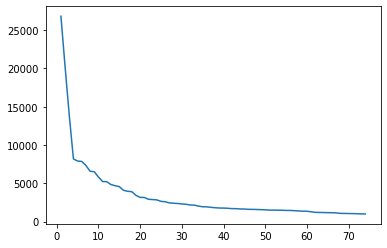

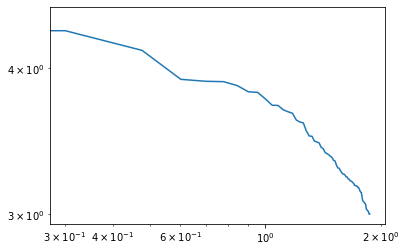

In [11]:
most_frequent_words = vocabulary[np.where(word_totals > 1000)]
most_frequent_word_counts = word_totals[np.where(word_totals > 1000)]

print("total count: ", most_frequent_word_counts.sum())
print(sorted(zip(most_frequent_word_counts, most_frequent_words), reverse=True))

seaborn.lineplot(x=range(len(most_frequent_words), 0, -1),
                 y=np.sort(most_frequent_word_counts))
pyplot.show()
pyplot.xscale('log')
pyplot.yscale('log')
seaborn.lineplot(x=range(len(most_frequent_words), 0, -1),
                 y=np.sort(most_frequent_word_counts))

## Problem 5 (tf-idf weighting, 20 points)

If we use the actual word counts, the values will be dominated by a few super-frequent words, and most of the other words will be rare words that we might never see again (eg typos, numbers, and variants like *yaaaaaaaassss*). In this problem we will read the reviews file again, but this time we will do two common pre-processing steps:

1. Remove rare words that occur in fewer than five reviews
2. Weight the remaining words by *inverse document frequency (IDF)*

Term frequency is the number of times a word occurs in a document. The *document frequency* of a word type is the number of documents in the collection that contain at least one instance of the word. If the collection contains $D$ documents and $df_w$ is the document frequency of word $w$, the inverse document frequency for $w$ is usually defined as $-\log(\frac{df_w}{D}) = \log(\frac{D}{df_w})$.

Using our favorite log probabilities, a word that occurs in 10% of documents would have IDF 2.3, and a word that occurs in 1 out of 100,000 documents would have IDF 11.5. Instead of recording the term frequency of word $w$ in document $d$, our array will now record the term frequency for $w$ in $d$ *multiplied* by the IDF for $w$. This weighting emphasizes rare words relative to frequent words.

Given that there are 4835 reviews and we are dropping words that occur in fewer than 5 documents, print the maximum possible IDF value for a word in the resulting collection.

Create a `TfidfVectorizer` called `tfidf_vectorizer` setting the minimum document frequency to 5. See [the API documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) for the appropriate option.
Use the `fit_transform` function to transform the `Text` field into an array. Save this array as a new variable `reviews_tfidf`.
Create a new variable `tfidf_vocabulary` in the same way you did before. Find the index for the word *amazing* and comment on whether it is in the same index position as before, and why or why not.

In [12]:
print(np.log(4835/5))


tfidf_vectorizer = TfidfVectorizer(min_df=5) 
reviews_tfidf = tfidf_vectorizer.fit_transform(reviews_df["Text"])
tfidf_vocabulary = tfidf_vectorizer.get_feature_names_out()
print(np.where(tfidf_vocabulary == 'amazing')) 

6.874198495453294
(array([240]),)


**Answers here**


It's in a different position because we've removed words and changed things around slightly

## Problem 6 (Naive Bayes classifier, 20 points)

Now that we have a curated representation of our reviews data set, we can try running a classifier on it.

Create a train/test split with 10% test size from the `reviews_tfidf` array and the "Rating" column of the original data set. Use random state 2950 so we identify correct answers efficiently when grading.

Create a classifier called `nb_classifier` using `MultinomialNB` from sklearn (imported above) and fit it with the training reviews and the training ratings (positive/negative). Note that as with logistic regression you can pass strings as labels, sklearn will translate these into 0/1 for you.

Use the `score` function on the classifier to get average accuracy for the test vectors and the test ratings. Print this value.

In [13]:
reviews_train, reviews_test, rating_train, rating_test = train_test_split(reviews_tfidf, reviews_df["Rating"], test_size = 0.1, random_state = 2950)
nb_classifier = MultinomialNB() 
nb_classifier.fit(reviews_train,rating_train) 

print(nb_classifier.score(reviews_test,rating_test))

0.859504132231405


## Problem 7 (comparing log probabilities, 10 points)

The field `.feature_log_prob_` on the `nb_classifier` object is an array with one row per label (positive, negative) and one column per word type (input "feature" in machine learning). Each entry represents the log probability of the word in that type of document. 

Create an array that represents the difference between these two rows. Use `zip` to merge this array with the `tfidf_vocabulary` array into a list of tuples. Sort this array. Using a for loop, print the score (up to two decimal places) and the associated word for the first 50 entries and the last 50 entries in the sorted list of tuples. (Hint: Python sorts tuples by the entries in order, so make sure the numeric value comes first)

Describe what the numbers mean, and comment on whether you think this is a good ranking of words for positive and negative reviews, and why

In [14]:
new_array = nb_classifier.feature_log_prob_
new_array = new_array[1] - new_array[0]
new_array = zip(new_array,tfidf_vocabulary) 
new_array = sorted(new_array) 



for i in list(new_array[:50]):
    print(str(i[1]),(np.round_(i[0], 2)))  

print("positive reviews")
    
for i in list(new_array[-50:]):
    print(str(i[1]),(np.round_(i[0], 2))) 




rude -2.89
worst -2.77
terrible -2.76
horrible -2.58
awful -2.43
disgusting -2.29
cox -2.27
worse -2.17
poor -2.1
nasty -2.06
unprofessional -2.05
ruined -1.99
refund -1.98
waste -1.89
smoking -1.83
overpriced -1.81
poorly -1.81
shitty -1.81
incompetent -1.79
bland -1.78
tasteless -1.78
cancelled -1.76
airline -1.76
dump -1.75
cancel -1.75
dirty -1.74
fail -1.74
cable -1.73
refused -1.72
garbage -1.72
receipt -1.7
overcooked -1.7
lousy -1.7
gross -1.7
unfriendly -1.68
technical -1.67
disappointing -1.67
rudely -1.66
sucks -1.66
airways -1.66
annoyed -1.65
message -1.65
bureau -1.64
downhill -1.63
edible -1.62
angry -1.61
ontrac -1.6
deposit -1.59
poisoning -1.59
trash -1.58
positive reviews
nice 1.25
gem 1.25
phoenix 1.26
thank 1.26
prices 1.26
flavors 1.26
selection 1.26
recommended 1.3
bruschetta 1.31
clean 1.32
spot 1.33
variety 1.34
recommend 1.35
incredible 1.37
fabulous 1.37
comfortable 1.37
unique 1.38
town 1.38
coffee 1.4
fast 1.4
quick 1.42
affordable 1.43
reasonable 1.44
cool

**Answer here**

These numbers basically mean that the first 50 words are found with higher probability in the negative reviews and the last 50 are found with with higher probability in the positive reviews so yes I would say it makes sense. 

for example, `amazing 2.55` means that the difference of the log probability of "amazing" being in a good review versus a bad review is 2.55, so a positive number, whereas the same for "poisoning" is a negative number meaning that "poisoning" is less likely to be found in a positive review than "amazing"-- basically when subtracting these negative numbers from eachother `-9 - (-7)` still yields a negative number whereas `-7 - (-9)` would yield a positive number. 

I think this is a good ranking because I looked over the words and they seem overwhelmingly to make sense for the positive and negative reviews

## Problem 8 (make predictions, 10 points)

Create a list called `my_reviews` that contains four strings, each containing a review that you write. You will transform this list into an array with `tfidf_vectorizer` and predict the rating using `nb_classifier`. The first review should be positive to you and score `positive` to the classifier. The second should be negative and score `negative`. The third should be positive but incorrectly score `negative`, and the fourth should be negative and incorrectly score `positive`. Use the words above as inspiration.

In [15]:
a = 'this place was so good i loved the food and the staff were also super nice. lovely atmosphere and fast service'
b = 'zero stars, terrible service. food was cold'
c =  'definintely not the worst'
d = 'i am positive that this food was not the best'
my_reviews = [a, b, c, d]

predict_rating = nb_classifier.predict(tfidf_vectorizer.transform(my_reviews))
print(predict_rating)


['positive' 'negative' 'negative' 'positive']


## Problem 9 (k-means clustering, 20 points)

Create a `KMeans` clustering with $K=100$ in a variable called `clustering`. Fit it to the full `reviews_tfidf` data set (since we don't need labels, there's no need to do a train/test split).

The `.labels_` array in a K-means clustering object has one elment per document, representing the ID of the cluster the document is assigned to.

Print the cluster associated with the document at index 11. Then find the indices of all the documents assigned to that cluster. Print these indices. Finally, use a for loop to print the `Text` field of that document from the original data frame.

Describe the contents of the cluster. Rerun the clustering a few times (do *not* set the random seed). Describe what changes from run to run and what is the same.

Finally, look at the documents in three other clusters. Describe whether you can see a pattern in what documents are clustered together.

In [22]:
#from pandas.core.internals.ops import operate_blockwise

clustering = KMeans(n_clusters = 100).fit(reviews_tfidf)

clustering.labels_[11]

44

In [17]:
c1 = np.where(clustering.labels_ == clustering.labels_[11])

print(np.where(clustering.labels_ == clustering.labels_[11])) 

(array([   3,    5,    9,   11,  600,  623,  625,  626,  994, 1564, 1565,
       1928, 2903, 3706, 3707, 3783, 4378, 4737, 4797]),)


In [18]:
r = np.array(reviews_df["Text"])
for i in c1 : 
  print(r[i])

["You won't be disappointed. We've eaten here about 7 times now, and we are ALWAYS delighted. The Beef Panang is just killer. The strips of beef are incredibly tender and of high quality. I usually find that the strips are a perfect medium (which I didn't know was possible in Thai cuisine). The sauce, ohhhhhh the sauce. Pour it over the rice (if you get it to go) and just love. Personally, my favorite is the yellow curry. Look, I've had Thai Elephant, Thai-E-Sam, Thai Basil, and another Thai joint in Phoenix that I can't remember. Yellow curry is my dish. It's absolutely the best here. Every time I eat it, my scalp tingles and I slip into a blissful happy place. The steamed vegetables are so tender that they fall apart. The little relish on the side is shockingly delicious and refreshing. The duck sauce that comes with the fried rolls makes them worthwhile. I know there's something with peanut sauce (satay?) that makes me happy. Appetizers and desserts are up to you. If you like cellop

In [19]:
c2 = np.where(clustering.labels_ == clustering.labels_[9])
r = np.array(reviews_df["Text"])
for i in c2 : 
  print(r[i])


["You won't be disappointed. We've eaten here about 7 times now, and we are ALWAYS delighted. The Beef Panang is just killer. The strips of beef are incredibly tender and of high quality. I usually find that the strips are a perfect medium (which I didn't know was possible in Thai cuisine). The sauce, ohhhhhh the sauce. Pour it over the rice (if you get it to go) and just love. Personally, my favorite is the yellow curry. Look, I've had Thai Elephant, Thai-E-Sam, Thai Basil, and another Thai joint in Phoenix that I can't remember. Yellow curry is my dish. It's absolutely the best here. Every time I eat it, my scalp tingles and I slip into a blissful happy place. The steamed vegetables are so tender that they fall apart. The little relish on the side is shockingly delicious and refreshing. The duck sauce that comes with the fried rolls makes them worthwhile. I know there's something with peanut sauce (satay?) that makes me happy. Appetizers and desserts are up to you. If you like cellop

In [20]:
c3 = np.where(clustering.labels_ == clustering.labels_[1])
r = np.array(reviews_df["Text"])
for i in c3 : 
  print(r[i])

['Matt and Tim were great. When going over solutions I felt they were straight forward and upfront about the cost of the repairs. I also felt that they understood how I felt about being separated from my money. Our Volvo is running great and we hope to keep it running for a long time with the help of Virginia Auto Service.'
 "Well, I have a little 2001 Ford Taurus. My lovely silver grandma car is fantastic for the 100-200 miles I drive per month. And now, my little car has a great shop looking after her. I took my car in as it was time for an oil change and I was convinced my serpentine belt was about to go. It had that tell-tale burning smell which was making me nervous. Turns out I had a loose oil-filter from my last oil change and dripping oil + catalytic converter = my car is about to die smell. Virginia Auto Service changed my oil and cleaned up my engine. It was so nice to receive a call from them saying my belt was fine and an oil change was all I needed. It was refreshing to be

In [21]:
 c4 = np.where(clustering.labels_ == clustering.labels_[2])
r = np.array(reviews_df["Text"])
for i in c4 : 
  print(r[i])

['Matt and Tim were great. When going over solutions I felt they were straight forward and upfront about the cost of the repairs. I also felt that they understood how I felt about being separated from my money. Our Volvo is running great and we hope to keep it running for a long time with the help of Virginia Auto Service.'
 "Well, I have a little 2001 Ford Taurus. My lovely silver grandma car is fantastic for the 100-200 miles I drive per month. And now, my little car has a great shop looking after her. I took my car in as it was time for an oil change and I was convinced my serpentine belt was about to go. It had that tell-tale burning smell which was making me nervous. Turns out I had a loose oil-filter from my last oil change and dripping oil + catalytic converter = my car is about to die smell. Virginia Auto Service changed my oil and cleaned up my engine. It was so nice to receive a call from them saying my belt was fine and an oil change was all I needed. It was refreshing to be

**Answer here**

The first cluster seems to be based on thai food

Second cluster seems to be based around the word 'Great' 

Third cluster seems to be about moving companies/transportation 

Fourth cluster seems to be about cars
